In [2]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
library(lme4)
library(sjPlot)
source("../../../spydr_scripts/functions/get_os.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘dplyr’ was built under R version 3.5.1”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:reshape’:

    expand

The following object is masked from ‘package:tidyr’:

    expand

Learn more about sjPlot with 'browseVignettes("sjPlot")'.


In [3]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)
fig_path = paste0(home, 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/figures/')

In [28]:
#  <- read_csv('clean_df.csv',col_types = cols())
# raw_df <- read_csv('raw_df_processed.csv',col_types = cols())
# epoch_df <- read_csv('epoch_df.csv',col_types = cols())

ls_sim_data <- read_csv("probC_sim_learning_signals_processed.csv", col_types=cols())
(n_subjects = length(unique(ls_sim_data$ID)))
(n_conditions = length(unique(ls_sim_data$cond)))
n_clean_trials = 600

#load observed data 
ls_obs_data <- read_csv("combined_learning_sig_obs_data.csv", col_types=cols())

#rename cond to condition 
ls_sim_data <- dplyr::rename(ls_sim_data,  condition = cond)

#translate false/true to 0/1
ls_sim_data$acc <- ifelse(ls_sim_data$acc == 'True', 1, 0)
ls_sim_data$gen_drift <- ifelse(ls_sim_data$acc == 1, abs(ls_sim_data$gen_drift),
                                ls_sim_data$gen_drift)

#reorder levels for convenient plotting 
ls_sim_data$condition <- factor(ls_sim_data$condition, levels = c('lc', 'hc', 'lv', 'hv'))

[1] 24

[1] 4

Warning message:
“Duplicated column names deduplicated: 'ID' => 'ID_1' [27]”

In [29]:
mean(ls_sim_data$gen_drift)

[1] 0.6338519

In [36]:
drift_plot <- ggplot(ls_sim_data, aes(y=gen_drift, x=condition, fill=condition)) + 
 stat_summary(fun.data = "mean_cl_boot", aes(color = condition), size = 1) +
stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Simulated Drift Rate (v)') + theme_tufte(base_size=22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none") 

bound_plot <- ggplot(ls_sim_data, aes(y=gen_bound, x=condition, fill=condition)) + 
 stat_summary(fun.data = "mean_cl_boot", aes(color = condition), size = 1) +
stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Simulated Decision Threshold (a)') + theme_tufte(base_size=22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none") 

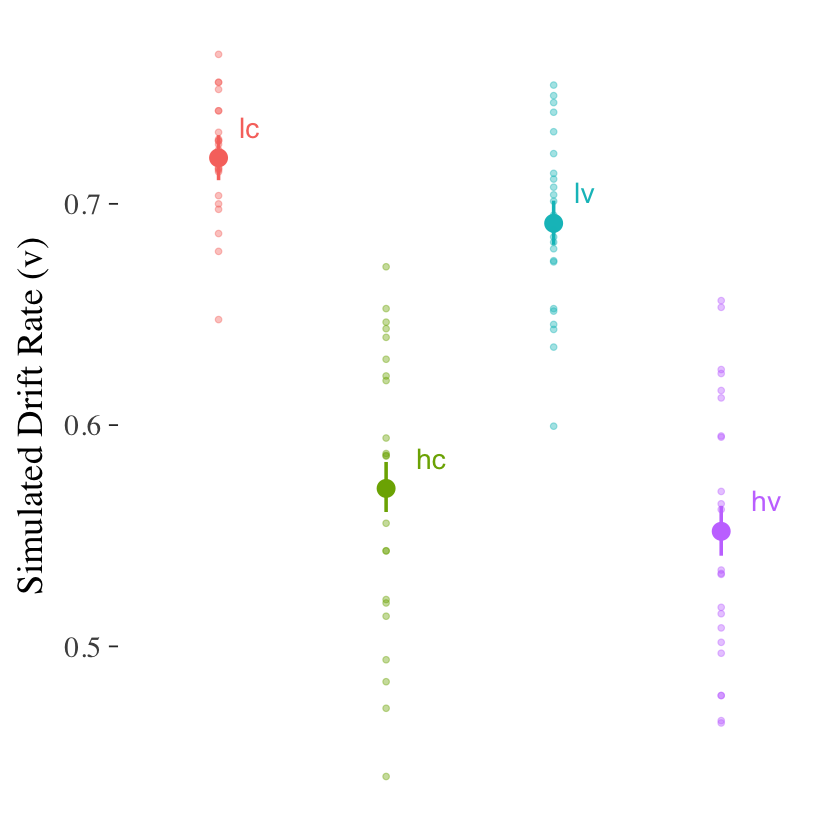

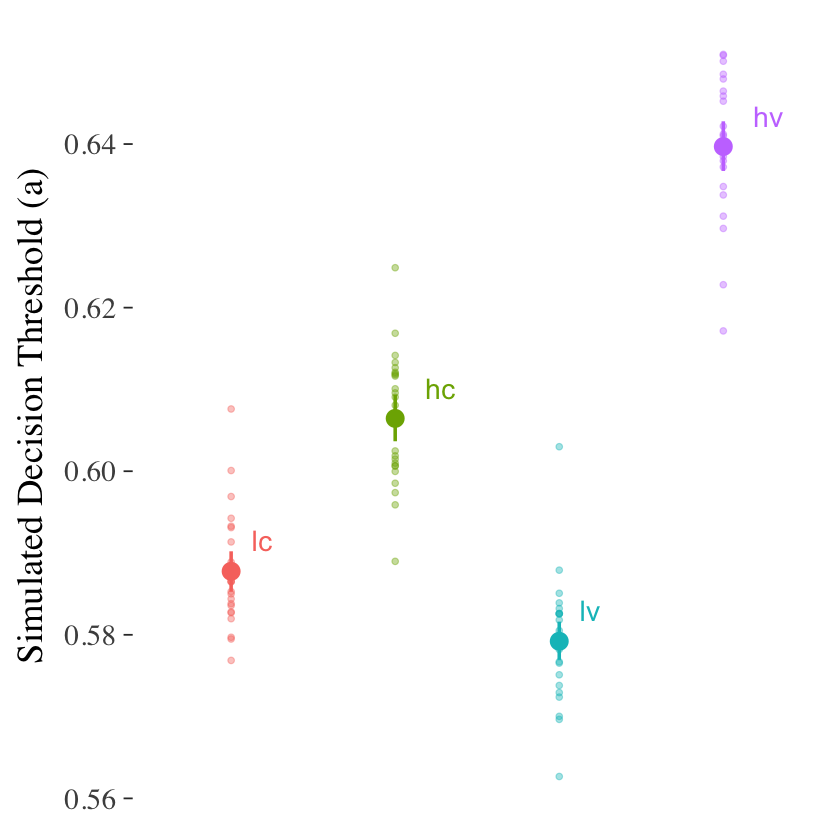

In [38]:
drift_plot; bound_plot

In [25]:
rt_plot <- ggplot(ls_sim_data, aes(y=rt, x=condition, fill=condition)) + 
 stat_summary(fun.data = "mean_cl_boot", aes(color = condition), size = 1) +
stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Simulated Reaction Time (s)') + theme_tufte(base_size=22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none") + 
coord_cartesian(ylim = c(0.25, 0.45))  + 



In [26]:
acc_plot <- ggplot(ls_sim_data, aes(y=acc, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", aes(color= condition), size = 1) +
stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Simulated Accuracy') + theme_tufte(base_size = 22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none")  +
coord_cartesian(ylim = c(0.45, 1))  

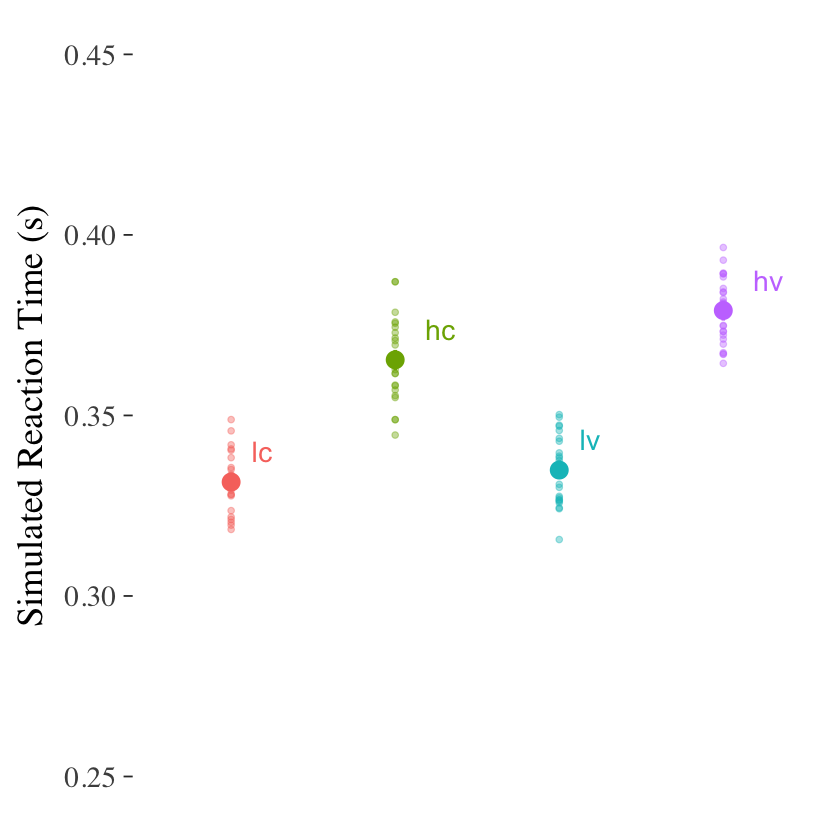

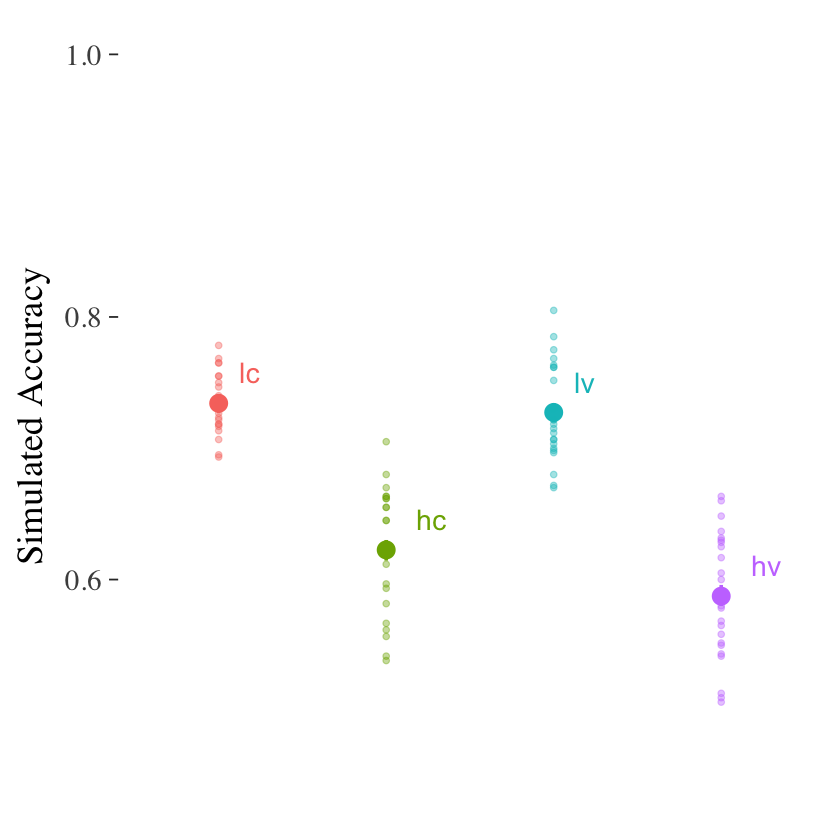

In [27]:
rt_plot; acc_plot

# ggsave(filename=paste0(fig_path, "sim_rt.png"), plot=rt_plot)
# ggsave(filename=paste0(fig_path, "sim_acc.png"), plot=acc_plot)

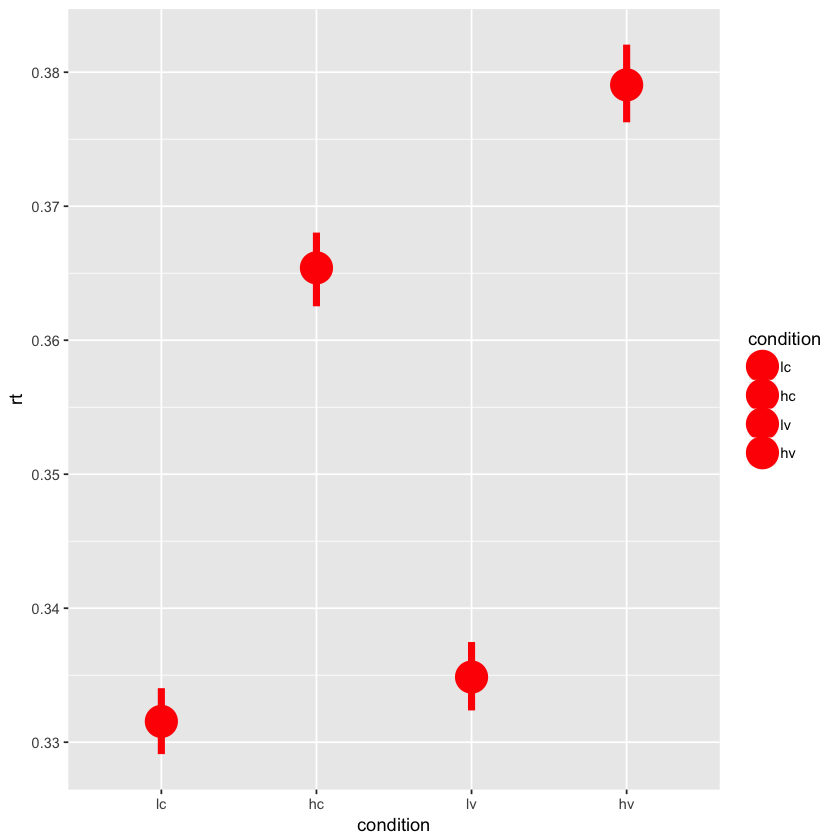

In [89]:
ggplot(ls_sim_data, aes(y=rt, x=condition, fill=condition)) + stat_summary(fun.data = "mean_cl_boot", colour = "red", size = 2)

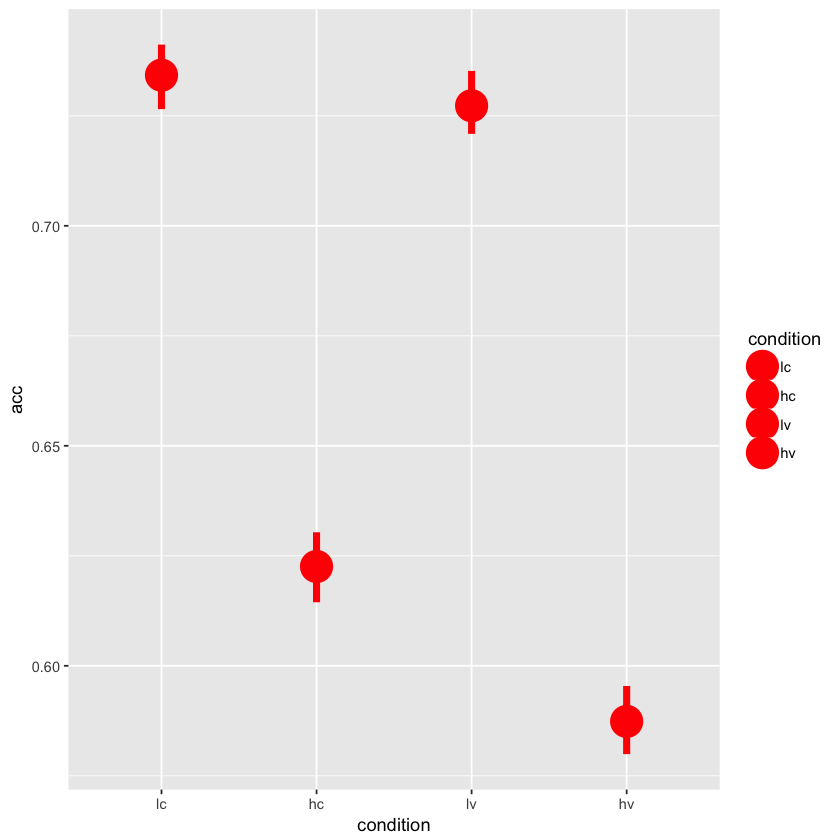

In [90]:
ggplot(ls_sim_data, aes(y=acc, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", colour = "red", size = 2)

In [37]:
library(boot)

sample_mean <- function(data, indices) {
     d = data[indices]
    return(mean(d))
}

boot_mean_rt_global <- boot(data=ls_sim_data$rt, 
  	R=1000, statistic=sample_mean, strata=ls_sim_data$ID)
boot_mean_acc_global <- boot(data=ls_sim_data$acc, 
  	R=1000, statistic=sample_mean, strata=ls_sim_data$ID)

In [42]:
(global_rt_ci = boot.ci(boot_mean_rt_global, type='perc')$percent[4:5])
(global_acc_ci = boot.ci(boot_mean_acc_global, type='perc')$percent[4:5])

[1] 0.3514108 0.3540898

[1] 0.6640291 0.6715443

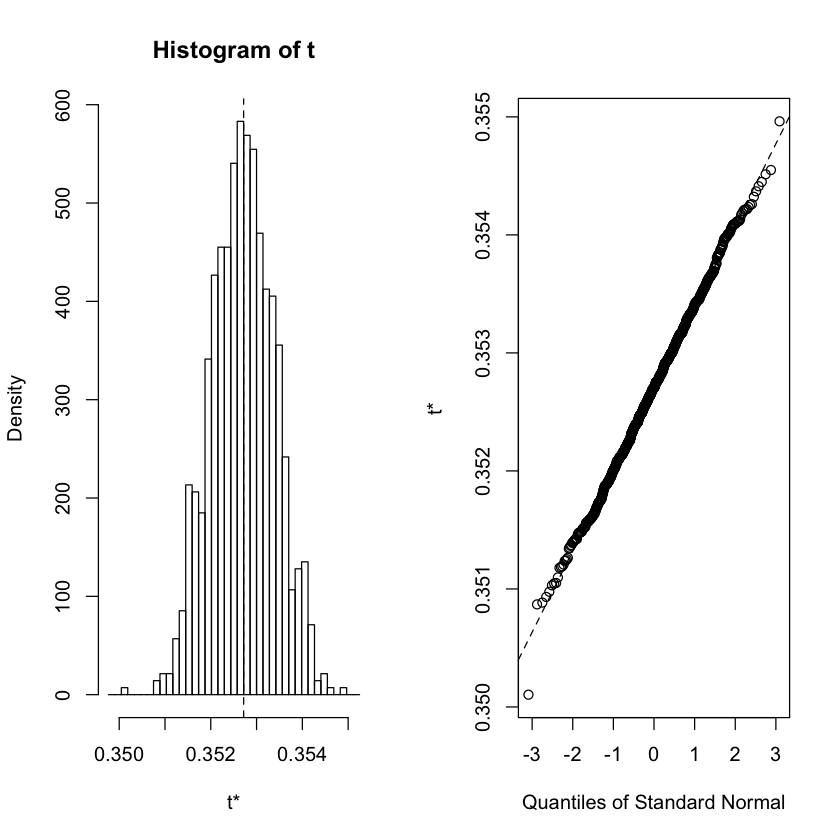

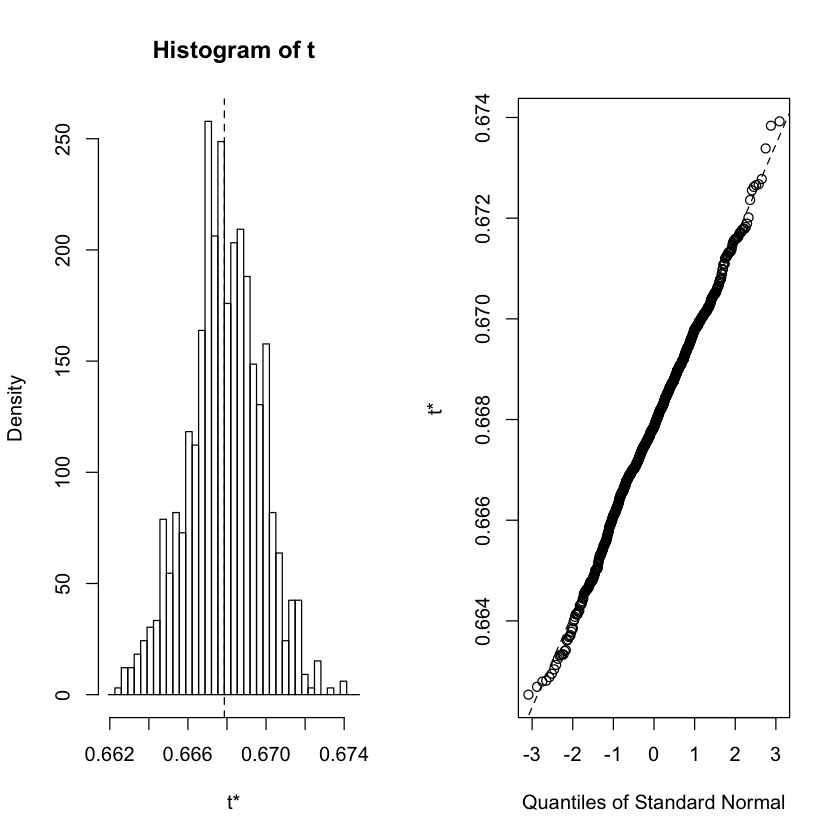

In [40]:
plot(boot_mean_rt_global); plot(boot_mean_acc_global)

In [44]:
range(ls_sim_data$ideal_B); range(ls_sim_data$gen_drift); range(ls_sim_data$gen_bound)

[1] -5.113855  5.864852

[1] -1  1

[1] 0.2277476 1.4999416

In [45]:
sum(ls_sim_data$cpp > 1 |ls_sim_data$cpp < 0 )

[1] 0

In [98]:
#use vectors of generative conflict and volatility parameters as predictors 
high_conflict_p = 0.65
mod_conflict_p = 0.75
low_conflict_p = 0.85

high_vol_lambda = .15
mod_vol_lambda = .25
low_vol_lambda = .35 

#generative conflict
ls_sim_data[ls_sim_data$condition == 'hc', 'reward_p'] = high_conflict_p
ls_sim_data[ls_sim_data$condition == 'lc', 'reward_p'] = low_conflict_p
ls_sim_data[ls_sim_data$condition == 'hv', 'reward_p'] = mod_conflict_p
ls_sim_data[ls_sim_data$condition == 'lv', 'reward_p'] = mod_conflict_p

#generative volatility
ls_sim_data[ls_sim_data$condition == 'hv', 'lambda'] = high_vol_lambda
ls_sim_data[ls_sim_data$condition == 'lv', 'lambda'] = low_vol_lambda
ls_sim_data[ls_sim_data$condition == 'hc', 'lambda'] = mod_vol_lambda
ls_sim_data[ls_sim_data$condition == 'lc', 'lambda'] = mod_vol_lambda

In [48]:
#check for equal n
table(ls_sim_data$ID, ls_sim_data$condition)

table(ls_sim_data$lambda)
table(ls_sim_data$reward_p)

     
       lc  hc  lv  hv
  761 600 600 600 600
  762 600 600 600 600
  763 600 600 600 600
  764 600 600 600 600
  765 600 600 600 600
  766 600 600 600 600
  767 600 600 600 600
  768 600 600 600 600
  769 600 600 600 600
  770 600 600 600 600
  771 600 600 600 600
  772 600 600 600 600
  773 600 600 600 600
  774 600 600 600 600
  775 600 600 600 600
  776 600 600 600 600
  777 600 600 600 600
  778 600 600 600 600
  779 600 600 600 600
  780 600 600 600 600
  781 600 600 600 600
  782 600 600 600 600
  783 600 600 600 600
  784 600 600 600 600


   15    25    35 
14400 28800 14400 


 0.65  0.75  0.85 
14400 28800 14400 

In [99]:
#separate regressions for conflict & volatility 
ls_sim_data$log_rt <- log(ls_sim_data$rt)

#create two distinct dfs
conflict_df <- subset(ls_sim_data, condition == 'hc' | condition == 'lc')
vol_df <- subset(ls_sim_data, condition == 'hv' | condition == 'lv')

In [100]:
ls_sim_data_cor <- cor(ls_sim_data[,c("cpp","target_B",
                                             "choice_B", "ideal_B", "rt", 
                                             "gen_drift", "gen_bound", "reward_p", 'lambda' )])

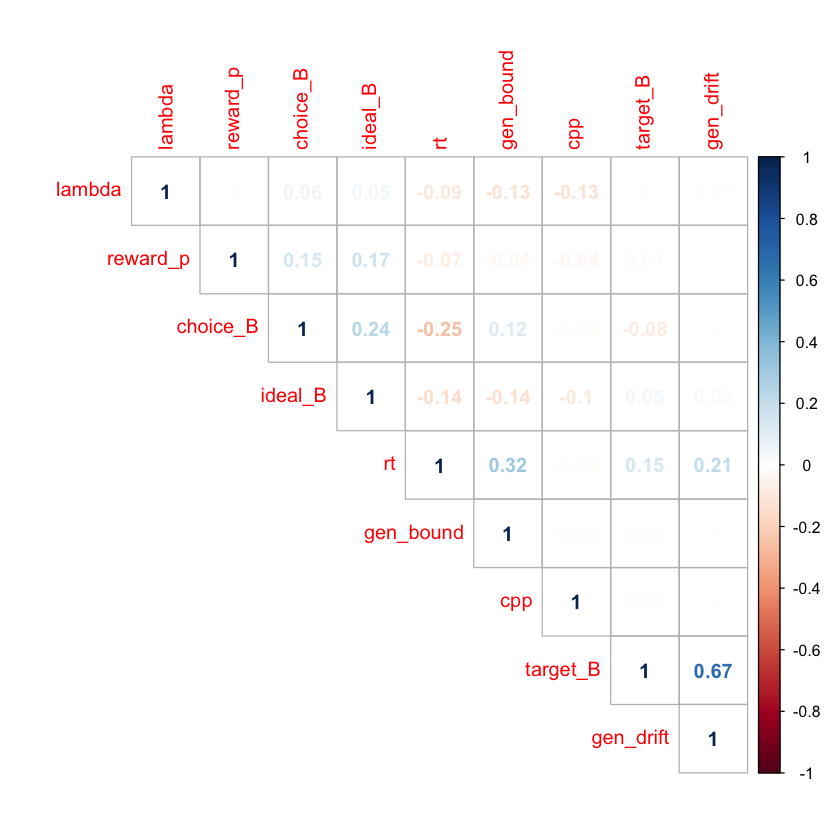

In [101]:
library(corrplot)
corrplot(ls_sim_data_cor, method="number", type="upper", order="hclust")

# Are learning signals correlated? 

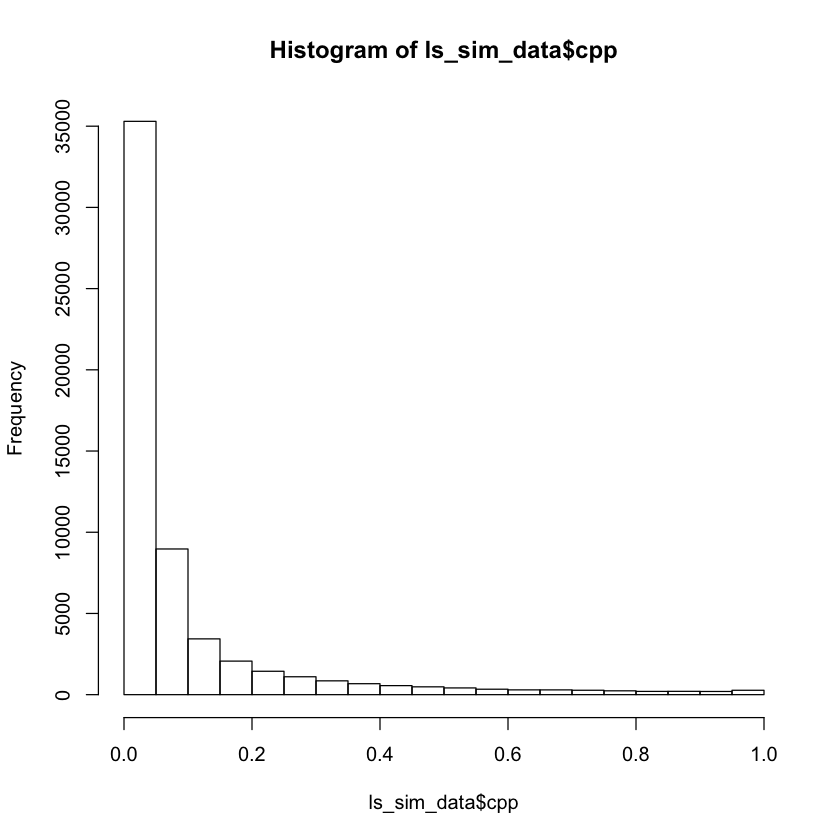

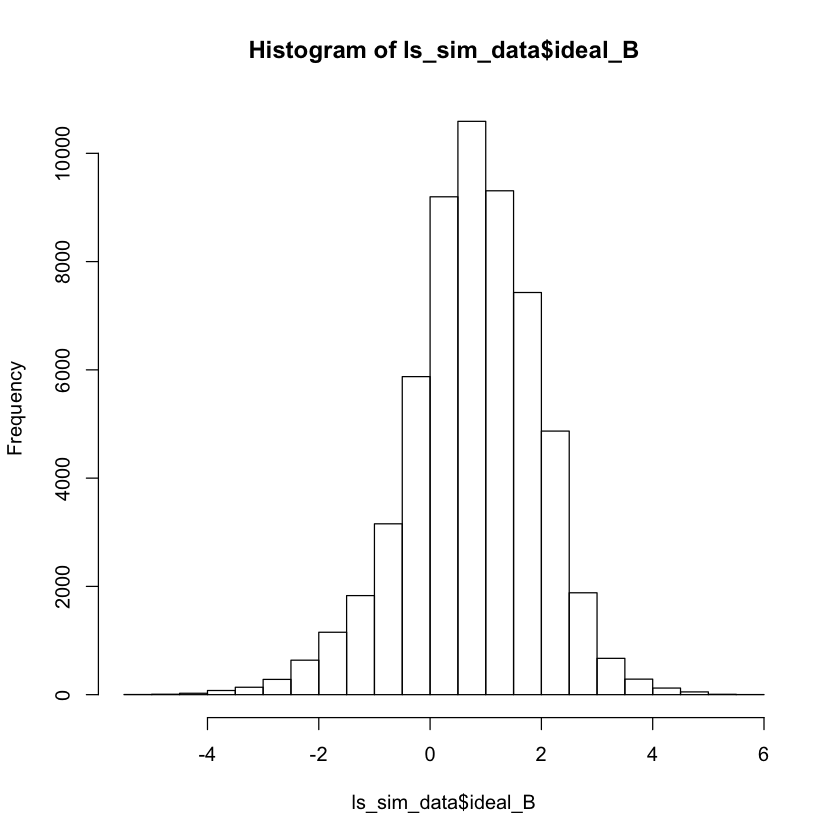

In [53]:
#test for correlation 
#if both have normal dist, use pearson 
#if not, use spearman
hist(ls_sim_data$cpp); hist(ls_sim_data$ideal_B)

## cpp & ideal_B have a weak but significant negative correlation, -0.15


In [54]:
#cpp & ideal_B have a weak but significant negative correlation, -0.15
cor.test(ls_sim_data$ideal_B, ls_sim_data$cpp, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_sim_data$ideal_B and ls_sim_data$cpp
S = 3.6653e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1507721 


In [55]:
cor.test(ls_sim_data$lambda, ls_sim_data$cpp, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_sim_data$lambda and ls_sim_data$cpp
S = 4.3098e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3531435 


In [56]:
cor.test(ls_sim_data$reward_p, ls_sim_data$ideal_B, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_sim_data$reward_p and ls_sim_data$ideal_B
S = 2.5533e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1983328 


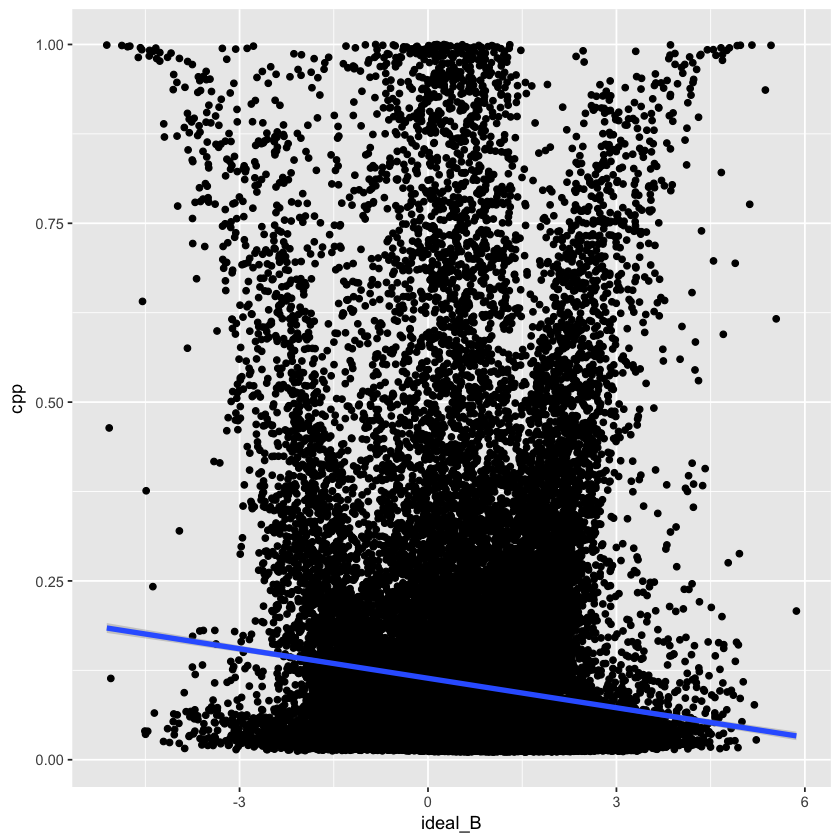

In [57]:
ggplot(ls_sim_data, aes(ideal_B, cpp)) + geom_point() +  geom_smooth(method='lm', aes(), size=1.5) 

# Predictors
### Generative conflict & volatility parameters 
### * mean probability of reward for target with highest expected value, $p_r$
### * mean epoch length, $\lambda$
### Ideal observer learning signals 
### * change point probability, $\Omega$
### * belief in the difference of the reward value of the most rewarding target and the suboptimal target, $B_\Delta$
# Outcomes 
### Reaction time 
### Binary acc

# Statistical models 
### Because change point probability is correlated with belief, the effects of  change point probability & belief are modeled separately according to levels of volatility & conflict 
### $\hat{Y}_{rt_{vol}} = \beta_0 + \beta_{\lambda}\lambda+\beta_{\Omega}\Omega +\beta_{\lambda\Omega} \lambda\Omega + (1  | {\ ID}) + \epsilon$

 ### $\hat{Y}_{rt_{conflict}} = \beta_0 + \beta_{p_r}p_r+\beta_{B_\Delta}B_\Delta +\beta_{p_rB_\Delta}p_rB_\Delta + (1 | {\ ID}) + \epsilon$
 
 ****
 ### $\hat{Y}_{acc_{vol}} = \beta_0 + \beta_{\lambda}\lambda+\beta_{\Omega}\Omega +\beta_{\lambda\Omega} \lambda\Omega + (1  | {\ ID}) + \epsilon$

 ### $\hat{Y}_{acc_{conflict}} = \beta_0 + \beta_{p_r}p_r+\beta_{B_\Delta}B_\Delta +\beta_{p_rB_\Delta}p_rB_\Delta + (1 | {\ ID}) + \epsilon$


In [58]:
gen_conflict_rt_reg_unscaled <- lmer(log_rt ~ reward_p + (1| ID), conflict_df, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))
gen_conflict_acc_reg_unscaled <- glmer(acc ~ reward_p + (1 | ID),  family = 'binomial', conflict_df, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [59]:
summary(gen_conflict_rt_reg_unscaled)

Linear mixed model fit by REML ['lmerMod']
Formula: log_rt ~ reward_p + (1 | ID)
   Data: conflict_df
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

REML criterion at convergence: 31842

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.4814  -0.6794  -0.2312   0.5621   2.2220 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001558 0.03947 
 Residual             0.176456 0.42007 
Number of obs: 28800, groups:  ID, 24

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.82865    0.02039  -40.64
reward_p    -0.42612    0.02475  -17.21

Correlation of Fixed Effects:
         (Intr)
reward_p -0.911

In [60]:
summary(gen_conflict_acc_reg_unscaled)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: acc ~ reward_p + (1 | ID)
   Data: conflict_df
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 35722.1  35746.9 -17858.0  35716.1    28797 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8542 -1.2555  0.5932  0.7474  0.8693 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.01351  0.1162  
Number of obs: 28800, groups:  ID, 24

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.17899    0.09778  -12.06   <2e-16 ***
reward_p     2.58632    0.12696   20.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
reward_p -0.961

In [97]:
vol_df$lambda[0:3]

[1] 15 15 15

In [102]:
gen_vol_rt_reg_unscaled <- lmer(log_rt ~ lambda + (1| ID),  vol_df, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=2e5)))
gen_vol_acc_reg_unscaled <- glmer(acc ~ lambda + (1 | ID),  
                     family = 'binomial', vol_df, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=2e5)))

In [103]:
summary(gen_vol_rt_reg_unscaled)

Linear mixed model fit by REML ['lmerMod']
Formula: log_rt ~ lambda + (1 | ID)
   Data: vol_df
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

REML criterion at convergence: 32797.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.4159  -0.7041  -0.2114   0.5794   2.1132 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001458 0.03818 
 Residual             0.182421 0.42711 
Number of obs: 28800, groups:  ID, 24

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.97876    0.01033  -94.77
lambda      -0.59433    0.02517  -23.61

Correlation of Fixed Effects:
       (Intr)
lambda -0.609

In [104]:
summary(gen_vol_acc_reg_unscaled)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: acc ~ lambda + (1 | ID)
   Data: vol_df
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 36330.0  36354.8 -18162.0  36324.0    28797 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8308 -1.1548  0.6106  0.7687  0.9217 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.01819  0.1349  
Number of obs: 28800, groups:  ID, 24

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.11806    0.04279  -2.759  0.00579 ** 
lambda       3.15182    0.12606  25.003  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
lambda -0.707

### The degree of conflict and the belief in the value of the most rewarding target interact to increase the odds of a correct selection by a factor of 2.6. 

In [67]:
mean(conflict_df$ideal_B); mean(conflict_df$reward_p)

[1] 0.798297

[1] 0.75

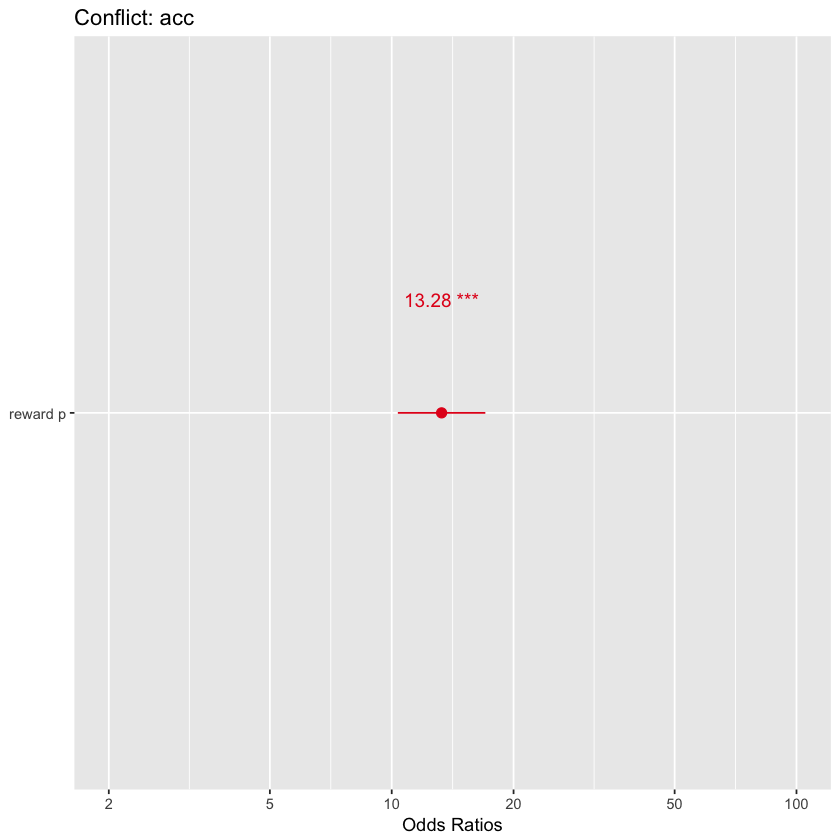

In [68]:
plot_model(gen_conflict_acc_reg_unscaled, show.values=TRUE, show.data=TRUE, 
           show.intercept = FALSE,  title='Conflict: acc')

### No evidence that reaction time changes with the probability of reward for the most rewarding target or the belief in the value of the most rewarding target.

In [70]:
exp(fixef(gen_conflict_rt_reg_unscaled))

(Intercept)    reward_p 
  0.4366396   0.6530380

In [71]:
(1-  0.653038008247832)*100

[1] 34.6962

Computing p-values via Wald-statistics approximation (treating t as Wald z).


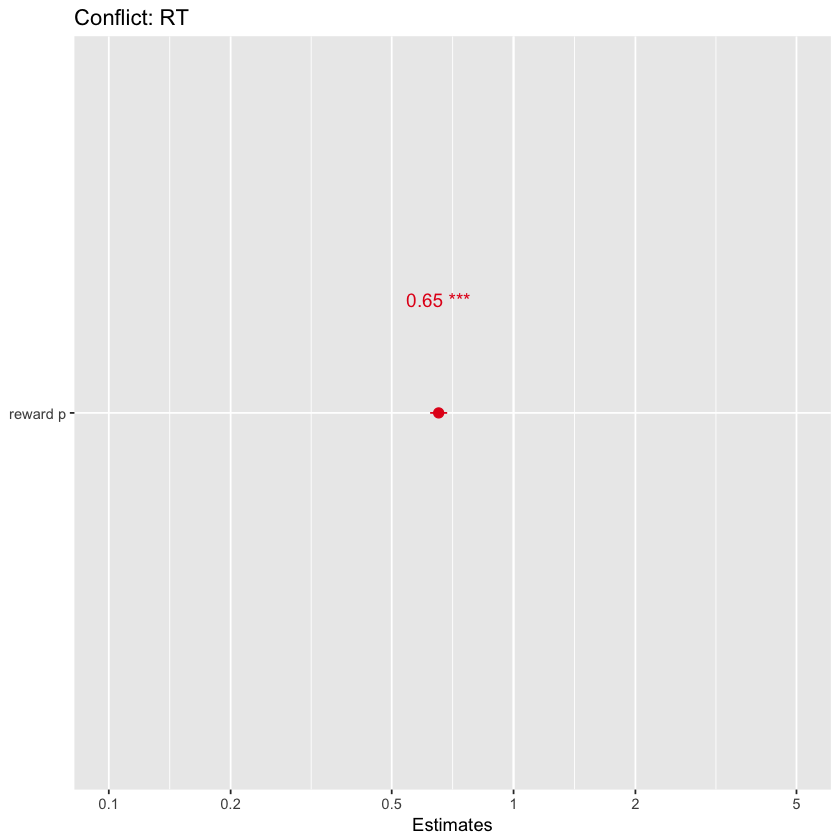

In [72]:
plot_model(gen_conflict_rt_reg_unscaled, show.values=TRUE, show.data=TRUE, 
           transform="exp",  title='Conflict: RT')

### For a one-unit increase in the length of the epoch, there's a 1% increase in the odds of choosing the most rewarding target. 


In [73]:
mean(vol_df$cpp); mean(vol_df$lambda)

[1] 0.1096358

[1] 25

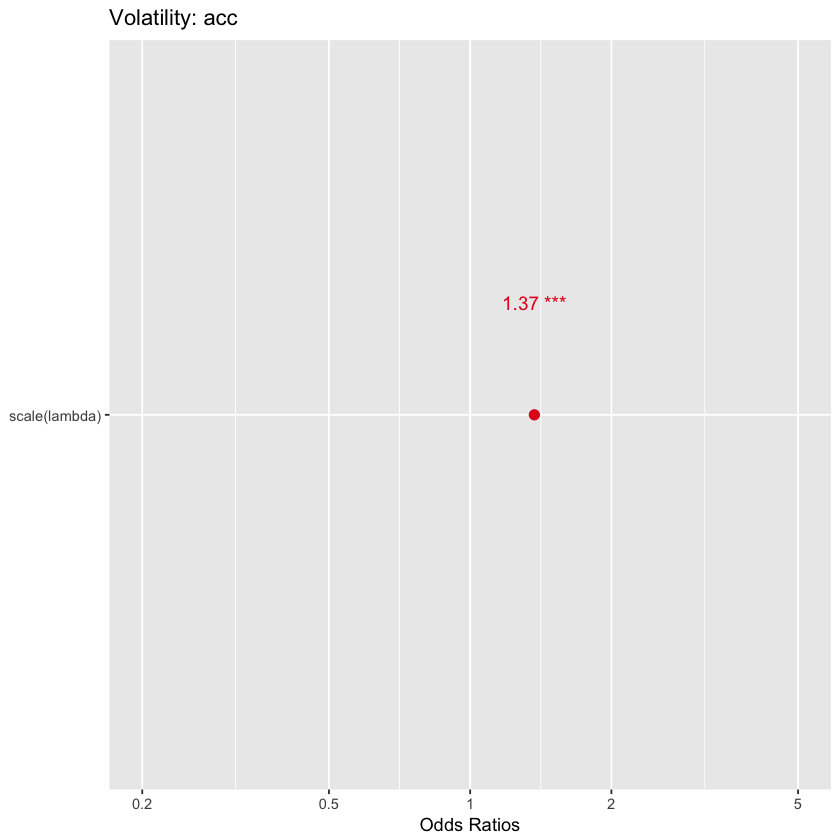

In [81]:
#trial stability instead of lambda
plot_model(gen_vol_acc_reg_unscaled, show.values=TRUE, show.data=TRUE,
             title='Volatility: acc')

Computing p-values via Wald-statistics approximation (treating t as Wald z).


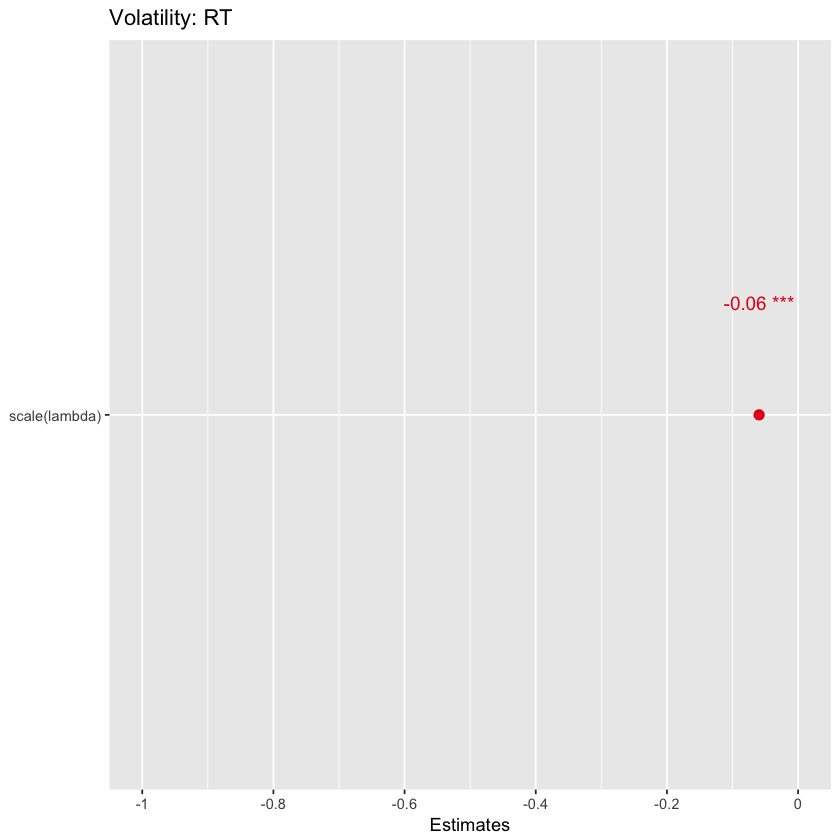

In [80]:
#trial stability instead of lambda
plot_model(gen_vol_rt_reg_unscaled, show.values=TRUE, show.data=TRUE,
             title='Volatility: RT')

### For a one-unit increase in the length of the epoch, reaction time decreases by 1.82 ms. No evidence that reaction time changes with change point probability.

In [111]:
ls_rt <- lmer(log_rt ~ ideal_B*cpp +  (1| ID), ls_sim_data, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [112]:
ls_acc <- glmer(acc ~ ideal_B*cpp + (1 | ID),  family = 'binomial', ls_sim_data, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [123]:
summary(ls_rt)

Linear mixed model fit by REML ['lmerMod']
Formula: log_rt ~ ideal_B * cpp + (1 | ID)
   Data: ls_obs_data
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

REML criterion at convergence: 13249.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6314 -0.5724 -0.1125  0.4326  4.7450 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.006649 0.08154 
 Residual             0.073487 0.27109 
Number of obs: 57600, groups:  ID, 24

Fixed effects:
             Estimate Std. Error t value
(Intercept) -1.148486   0.016726 -68.667
ideal_B     -0.002635   0.001189  -2.216
cpp          0.009941   0.007164   1.388
ideal_B:cpp -0.004071   0.003913  -1.040

Correlation of Fixed Effects:
            (Intr) idel_B cpp   
ideal_B     -0.057              
cpp         -0.054  0.257       
ideal_B:cpp  0.032 -0.586 -0.311

In [120]:
exp(fixef(ls_rt))

(Intercept)     ideal_B         cpp ideal_B:cpp 
  0.3171166   0.9973686   1.0099908   0.9959372

In [114]:
summary(ls_acc)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: p_id_accuracy ~ ideal_B * cpp + (1 | ID)
   Data: ls_obs_data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 67983.2  68028.0 -33986.6  67973.2    57595 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3318 -0.9983  0.4912  0.6916  4.4084 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.1684   0.4104  
Number of obs: 57600, groups:  ID, 24

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.28977    0.08473   3.420 0.000626 ***
ideal_B      0.57475    0.01054  54.538  < 2e-16 ***
cpp         -0.06587    0.05724  -1.151 0.249814    
ideal_B:cpp -0.23354    0.03451  -6.767 1.31e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) idel_B

In [94]:
# ggplot(ls_sim_data) +
# aes(x = cpp, y = ideal_B, color = factor(acc)) +
# geom_point() + ggtitle('acc interaction effect')


In [ ]:
library(boot)
set.seed(081318)
log_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- glmer(formula, data=d, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)
  return(fixef(fit))
} 

ls_acc_formula <- acc ~ ideal_B*cpp + (1 | ID)

# bootstrapping with 1000 replications 
ls_log_boot_results <- boot(formula=ls_acc_formula, data=ls_sim_data, 
  	R=1000, statistic=log_coef)


In [143]:
boot.ci(ls_log_boot_results, type='perc')

Warning message in norm.inter(t, alpha):
“extreme order statistics used as endpoints”

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10 bootstrap replicates

CALL : 
boot.ci(boot.out = ls_log_boot_results, type = "perc")

Intervals : 
Level     Percentile     
95%   ( 0.2789,  0.3152 )  
Calculations and Intervals on Original Scale
Some percentile intervals may be unstable

In [83]:
ls_rt <- lmer(log_rt ~ ideal_B*cpp +  (1| ID), ls_sim_data, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))
ls_acc <- glmer(acc ~ ideal_B*cpp + (1 | ID),  family = 'binomial', ls_sim_data, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

Computing p-values via Wald-statistics approximation (treating t as Wald z).


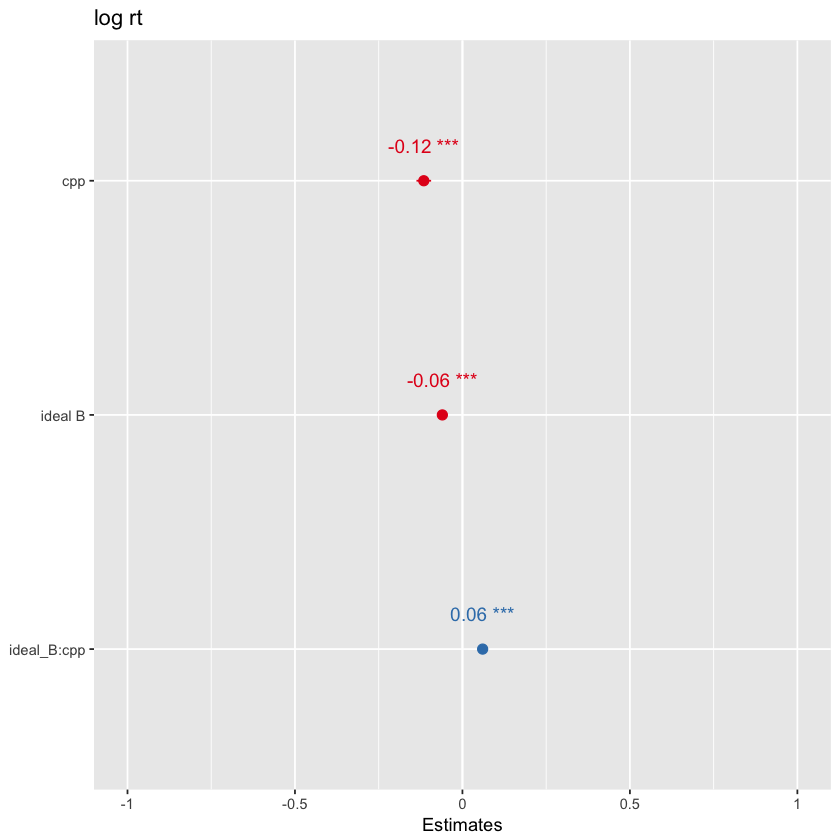

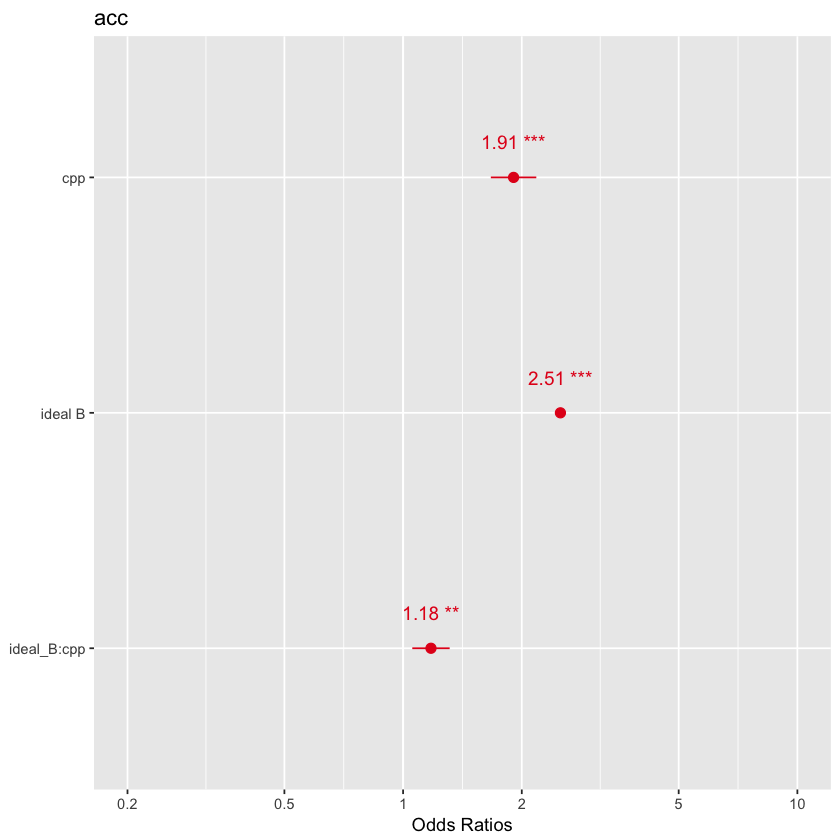

In [87]:
plot_model(ls_rt, show.values = TRUE)
plot_model(ls_acc, show.values = TRUE)

In [ ]:
lm_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- lmer(formula, data=d, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)
  return(fixef(fit))
} 

ls_rt_formula = log_rt ~ ideal_B*cpp +  (1| ID)

ls_lm_boot_results <- boot(formula=ls_rt_formula, data=ls_sim_data, 
  	R=1000, statistic=lm_coef, strata='ID')

In [ ]:
# get 95% confidence interval for each coefficient
log_intercept_boot_ci <-boot.ci(ls_log_boot_results, type="perc", index=1) # intercept 
log_ideal_B_boot_ci <-boot.ci(ls_log_boot_results, type="perc", index=2) # ideal_B 
log_cpp_boot_ci <- boot.ci(ls_log_boot_results, type="perc", index=3) # cpp
idael_B.cpp_boot_ci <- boot.ci(ls_log_boot_results, type="perc", index=4) # ideal_B*cpp interaction

In [ ]:
# get 95% confidence interval for each coefficient
lm_intercept_boot_ci <-boot.ci(ls_lm_boot_results, type="perc", index=1) # intercept 
lm_ideal_B_boot_ci <-boot.ci(ls_lm_boot_results, type="perc", index=2) # ideal_B 
lm_cpp_boot_ci <- boot.ci(ls_lm_boot_results, type="perc", index=3) # cpp
idael_B.cpp_boot_ci <- boot.ci(ls_lm_boot_results, type="perc", index=4) # ideal_B*cpp interaction